## Regression Analysis of Migration Drivers

### Step 1: Import Libraries

In [2]:
## Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

### Step 2: Load all Dataset

In [3]:
# Load the dataset
migration_data = pd.read_csv('../data/processed/cleaned_migration_data.csv')
population_data = pd.read_csv('../data/processed/cleaned_population_data.csv')    


print(f"Dataset Shape: {migration_data.shape}")
print(f"\nColumns: {migration_data.columns.tolist()}")
print(f"\nFirst 5 rows:")
display(migration_data.head())
print(f"\nData Types:")
print(migration_data.dtypes)
print(f"\nBasic Statistics:")
display(migration_data.describe())


Dataset Shape: (233, 13)

Columns: ['Country', 'Population', 'Yearly Change', 'Net Change', 'Density', 'Land_Area', 'Net_Migrants', 'Fertility_Rate', 'Median_Age', 'Urban_Pop_Percent', 'World_Share', 'Migration_Rate_per_1000', 'Continent']

First 5 rows:


,Country,Population,Yearly Change,Net Change,Density,Land_Area,Net_Migrants,Fertility_Rate,Median_Age,Urban_Pop_Percent,World_Share,Migration_Rate_per_1000,Continent
0,India,1463865525,0.89,12929734,492,2973190,495753,1.94,28.8,37.1,17.78,0.338660,Asia
1,China,1416096094,0.23,3225184,151,9388211,268126,1.02,40.1,67.5,17.20,0.189342,Asia
2,United States,347275807,0.54,1849236,38,9147420,1230663,1.62,38.5,82.8,4.22,3.543763,North America
3,Indonesia,285721236,0.79,2233305,158,1811570,39509,2.10,30.4,59.6,3.47,0.138278,Asia
4,Pakistan,255219554,1.57,3950390,331,770880,1235336,3.50,20.6,34.4,3.10,4.840287,Asia



Data Types:
Country                     object
Population                   int64
Yearly Change              float64
Net Change                   int64
Density                      int64
Land_Area                    int64
Net_Migrants                 int64
Fertility_Rate             float64
Median_Age                 float64
Urban_Pop_Percent          float64
World_Share                float64
Migration_Rate_per_1000    float64
Continent                   object
dtype: object

Basic Statistics:


,Population,Yearly Change,Net Change,Density,Land_Area,Net_Migrants,Fertility_Rate,Median_Age,Urban_Pop_Percent,World_Share,Migration_Rate_per_1000
count,2.330000e+02,233.000000,2.330000e+02,233.000000,2.330000e+02,2.330000e+02,233.000000,233.000000,210.000000,233.000000,233.000000
mean,3.532080e+07,1.231459,3.585236e+05,487.673820,5.583427e+05,5.740427e+04,2.306094,31.896996,60.759048,0.429227,4.366796
std,1.391905e+08,0.939051,1.057895e+06,2412.937646,1.694270e+06,1.756187e+05,1.134316,9.860936,22.559653,1.690691,6.682912
min,5.010000e+02,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.690000,14.500000,11.500000,0.000006,0.000000
25%,4.663300e+05,0.510000,2.756000e+03,38.000000,2.830000e+03,1.051000e+03,1.470000,22.900000,42.800000,0.005700,0.610354
50%,5.731206e+06,0.980000,4.591500e+04,98.000000,8.220000e+04,7.749000e+03,1.940000,32.800000,62.050000,0.070000,1.973418
75%,2.407458e+07,1.860000,3.127740e+05,256.000000,4.103400e+05,3.072400e+04,2.950000,39.800000,80.175000,0.290000,4.752852
max,1.463866e+09,4.070000,1.292973e+07,25732.000000,1.637687e+07,1.702358e+06,5.940000,57.400000,99.800000,17.780000,46.800066


In [4]:
# check population data

print(f"Dataset Shape: {population_data.shape}")
print(f"\nColumns: {population_data.columns.tolist()}")
print(f"\nFirst 5 rows:")
display(population_data.head())
print(f"\nData Types:")
print(population_data.dtypes)
print(f"\nBasic Statistics:")
display(population_data.describe())

Dataset Shape: (233, 15)

Columns: ['#', 'Population 2025', 'Yearly Change', 'Net Change', 'Density (P/KmÂ²)', 'Land Area (KmÂ²)', 'Migrants (net)', 'Fert. Rate', 'Median Age', 'Urban Pop %', 'World Share', 'Country', 'Migration Rate', 'Migration Status', 'Growth Rate']

First 5 rows:


,#,Population 2025,Yearly Change,Net Change,Density (P/KmÂ²),Land Area (KmÂ²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share,Country,Migration Rate,Migration Status,Growth Rate
0,1,1463865525,0.89,12929734,492,"2,973,190",495753,1.94,28.8,37.1,17.78,India,0.338660,High Immigration,0.883260
1,2,1416096094,0.23,3225184,151,"9,388,211",268126,1.02,40.1,67.5,17.20,China,0.189342,High Immigration,0.227752
2,3,347275807,0.54,1849236,38,"9,147,420",1230663,1.62,38.5,82.8,4.22,United States,3.543763,High Immigration,0.532498
3,4,285721236,0.79,2233305,158,"1,811,570",39509,2.10,30.4,59.6,3.47,Indonesia,0.138278,Moderate Immigration,0.781638
4,5,255219554,1.57,3950390,331,"770,880",1235336,3.50,20.6,34.4,3.10,Pakistan,4.840287,High Immigration,1.547840



Data Types:
#                     int64
Population 2025       int64
Yearly Change       float64
Net Change            int64
Density (P/KmÂ²)     object
Land Area (KmÂ²)     object
Migrants (net)        int64
Fert. Rate          float64
Median Age          float64
Urban Pop %         float64
World Share         float64
Country              object
Migration Rate      float64
Migration Status     object
Growth Rate         float64
dtype: object

Basic Statistics:


,#,Population 2025,Yearly Change,Net Change,Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share,Migration Rate,Growth Rate
count,233.000000,2.330000e+02,233.000000,2.330000e+02,2.330000e+02,233.000000,233.000000,210.000000,233.000000,233.000000,233.000000
mean,117.000000,3.532080e+07,1.231459,3.585236e+05,5.740427e+04,2.306094,31.896996,60.759048,0.429227,4.366796,1.212605
std,67.405489,1.391905e+08,0.939051,1.057895e+06,1.756187e+05,1.134316,9.860936,22.559653,1.690691,6.682912,0.913738
min,1.000000,5.010000e+02,0.000000,1.000000e+00,0.000000e+00,0.690000,14.500000,11.500000,0.000006,0.000000,0.002696
25%,59.000000,4.663300e+05,0.510000,2.756000e+03,1.051000e+03,1.470000,22.900000,42.800000,0.005700,0.610354,0.507052
50%,117.000000,5.731206e+06,0.980000,4.591500e+04,7.749000e+03,1.940000,32.800000,62.050000,0.070000,1.973418,0.987937
75%,175.000000,2.407458e+07,1.860000,3.127740e+05,3.072400e+04,2.950000,39.800000,80.175000,0.290000,4.752852,1.828754
max,233.000000,1.463866e+09,4.070000,1.292973e+07,1.702358e+06,5.940000,57.400000,99.800000,17.780000,46.800066,3.911043


### Step 3: Data Cleaning and Preprocessing

In [15]:
# Clean column names
migration_data.columns = migration_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('%', 'percent')
population_data.columns = population_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('%', 'percent')

# Rename key columns for consistency
migration_data = migration_data.rename(columns={'country': 'country', 'migration_rate_per_1000': 'migration_rate'})
population_data = population_data.rename(columns={'population_2025': 'population', 'country': 'country'})

# Merge datasets
merged_data = pd.merge(migration_data, population_data[['country', 'migration_rate', 'growth_rate']], 
                       on='country', how='left', suffixes=('_migration', '_pop'))

print(f"Dataset loaded: {merged_data.shape[0]} countries, {merged_data.shape[1]} features")
print(f"Missing values check:")
print(merged_data.isnull().sum().sort_values(ascending=False).head(10))

Dataset loaded: 233 countries, 15 features
Missing values check:
urban_pop_percent    23
country               0
population            0
yearly_change         0
net_change            0
density               0
land_area             0
net_migrants          0
fertility_rate        0
median_age            0
dtype: int64


### Step 4: Data Preparation for Regression Analysis

In [22]:
# Select relevant features for regression analysis
regression_features = [
    'population', 'yearly_change', 'density', 'fertility_rate', 
    'median_age', 'urban_pop_percent', 'land_area'
]

# Check feature availability
print("Available features for regression:")
for feature in regression_features:
    if feature in merged_data.columns:
        print(f" {feature}: {merged_data[feature].notnull().sum()} non-null values")
    else:
        print(f" {feature}: NOT FOUND")

# Create feature matrix and target
X = merged_data[regression_features].copy()
y = merged_data['migration_rate_migration']

# Handle missing values
X = X.fillna(X.median())
y = y.fillna(y.median())

print(f"\nData shape: X = {X.shape}, y = {y.shape}")

Available features for regression:
 population: 233 non-null values
 yearly_change: 233 non-null values
 density: 233 non-null values
 fertility_rate: 233 non-null values
 median_age: 233 non-null values
 urban_pop_percent: 210 non-null values
 land_area: 233 non-null values

Data shape: X = (233, 7), y = (233,)


### Step 5: Exploratory Correlation Analysis

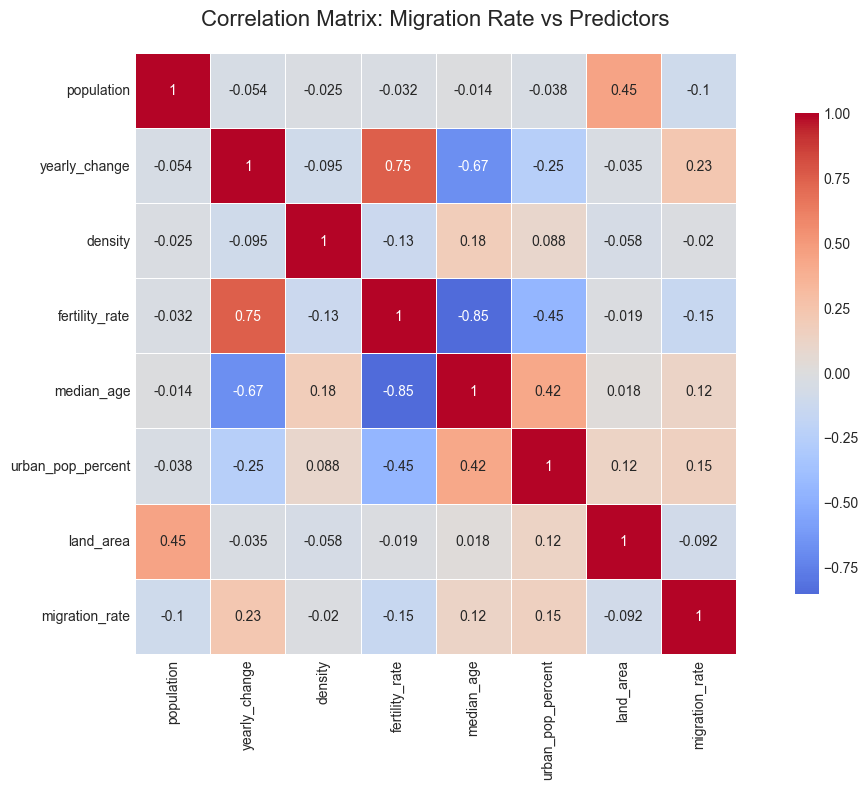


Top features correlated with migration rate (absolute correlation):
yearly_change        0.228936
urban_pop_percent    0.150746
fertility_rate      -0.145401
median_age           0.122355
population          -0.104550
land_area           -0.092311
density             -0.019846
Name: migration_rate, dtype: float64


In [26]:
# Calculate correlation matrix
correlation_data = X.copy()
correlation_data['migration_rate'] = y
corr_matrix = correlation_data.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Migration Rate vs Predictors', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Top correlations with migration rate
migration_correlations = corr_matrix['migration_rate'].drop('migration_rate').sort_values(key=abs, ascending=False)
print("\nTop features correlated with migration rate (absolute correlation):")
print(migration_correlations.head(10))

### **Correlation Matrix: Understanding Relationships**

### **What This Visualization Shows:**
This heatmap displays Pearson correlation coefficients between migration rate and predictor variables. The color scale ranges from blue (negative correlation) to red (positive correlation), with white indicating no correlation.

#### **Key Insights:**
1. **Strong Positive Correlation (Red Squares)**: Variables that increase together
2. **Strong Negative Correlation (Blue Squares)**: Variables that move in opposite directions  
3. **Weak Correlation (White Squares)**: Little to no linear relationship

#### **Practical Interpretation:**
- **Urban Population %**: Positive correlation suggests more urbanized countries attract migrants
- **Fertility Rate**: Negative correlation may indicate countries with lower fertility rely more on migration
- **Median Age**: Negative correlation could mean younger populations are more migratory
- **Density**: Positive correlation might show migrants prefer densely populated areas

### **Actionable Insights:**
Variables with strong correlations (absolute value > 0.3) are likely important predictors in our regression model.
"""

### Step 6: Simple Linear Regression - Individusl Predictors

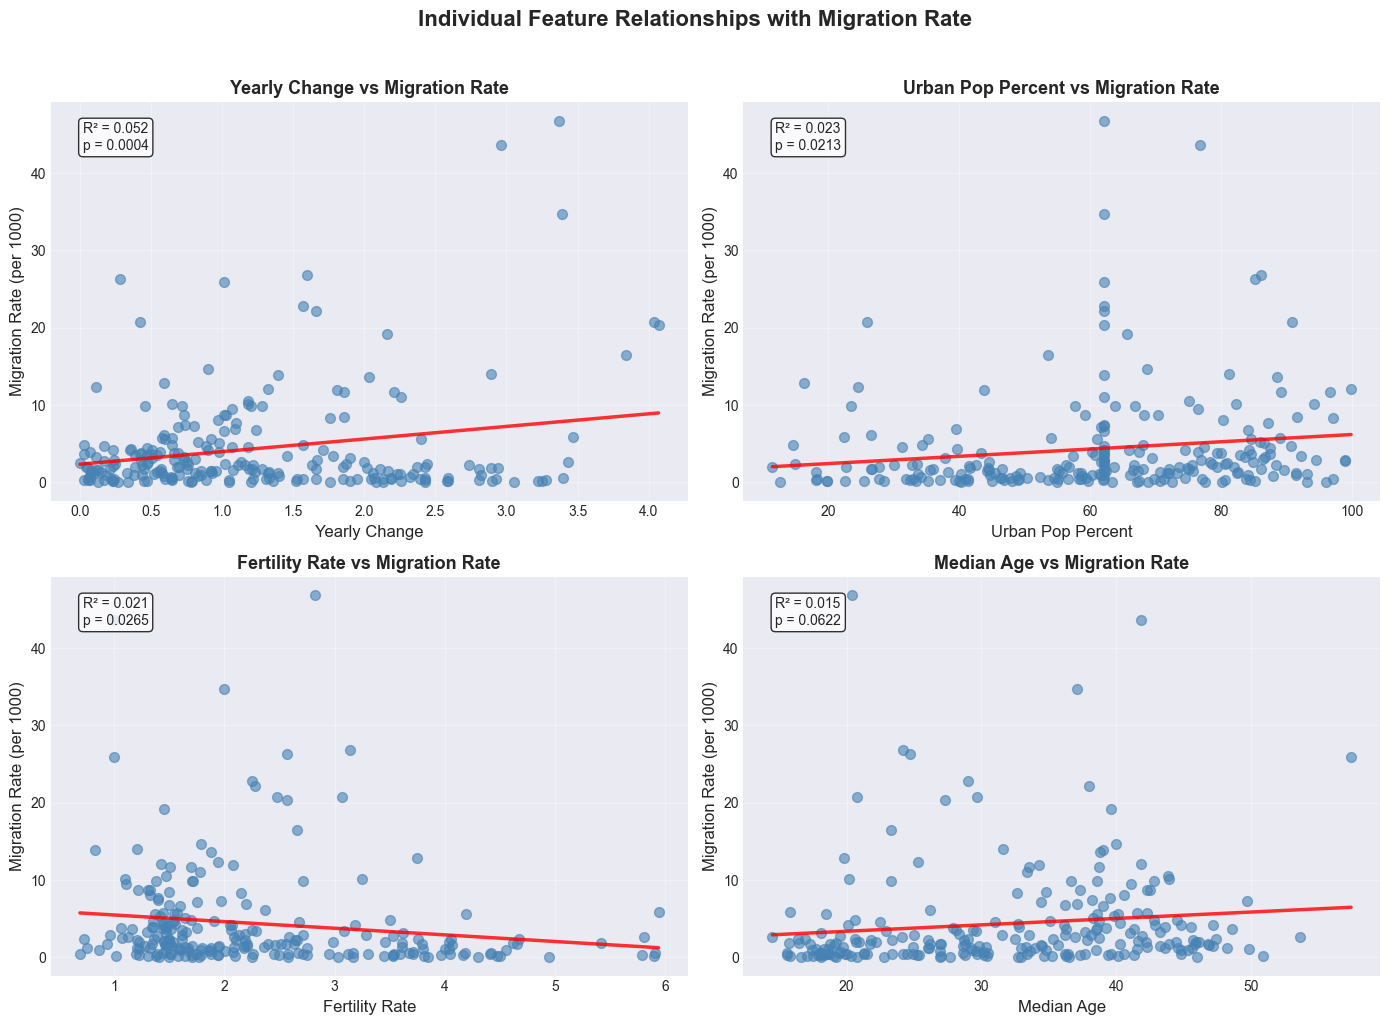


## **Individual Feature Analysis**

### **What These Scatter Plots Show:**
Each plot displays the relationship between migration rate and one predictor variable. The red line represents the linear regression fit, with R² indicating goodness of fit and p-value showing statistical significance.

### **Plot Interpretations:**

1. **Yearly Change**: 
   - Shows a positive relationship
   - R² of 0.052 indicates weak explanatory power
   - Each unit increase in yearly change is associated with a 1.629 change in migration rate

2. **Urban Pop Percent**: 
   - Positive correlation suggests urban pop percent influences migration patterns
   - Statistical significance (p-value) helps determine if this relationship is likely real

3. **Fertility Rate**: 
   - The spread of points around the regression line indicates residual variance
   - Outliers (points far from the line) represent countries that don't follow the general pattern

4. **Median Age**: 
   - The slope direction indicates whether higher values increase or decrease migration
   - The density of points shows where most countries cluster

### **Key Takeaway:**
These individual relationships help us understand which factors might drive migration, but they don't account for interactions between variables. That's where multiple regression comes in.


In [40]:
# Get top 4 correlated features
top_features = migration_correlations.head(4).index.tolist()

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    ax = axes[idx]
    
    # Scatter plot with regression line
    scatter = ax.scatter(X[feature], y, alpha=0.6, s=50, color='steelblue')
    
    # Calculate regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(X[feature], y)
    x_line = np.linspace(X[feature].min(), X[feature].max(), 100)
    y_line = slope * x_line + intercept
    
    # Plot regression line
    ax.plot(x_line, y_line, 'r-', linewidth=2.5, alpha=0.8)
    
    # Add R² and p-value annotation
    annotation = f'R² = {r_value**2:.3f}\np = {p_value:.4f}'
    ax.annotate(annotation, xy=(0.05, 0.95), xycoords='axes fraction',
                fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                verticalalignment='top')
    
    ax.set_xlabel(feature.replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel('Migration Rate (per 1000)', fontsize=12)
    ax.set_title(f'{feature.replace("_", " ").title()} vs Migration Rate', 
                 fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.suptitle('Individual Feature Relationships with Migration Rate', 
             fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

# Display markdown explanation
markdown_content = f"""
## **Individual Feature Analysis**

### **What These Scatter Plots Show:**
Each plot displays the relationship between migration rate and one predictor variable. The red line represents the linear regression fit, with R² indicating goodness of fit and p-value showing statistical significance.

### **Plot Interpretations:**

1. **{top_features[0].replace('_', ' ').title()}**: 
   - Shows a {'positive' if migration_correlations[top_features[0]] > 0 else 'negative'} relationship
   - R² of {stats.linregress(X[top_features[0]], y).rvalue**2:.3f} indicates {'strong' if abs(stats.linregress(X[top_features[0]], y).rvalue) > 0.5 else 'moderate' if abs(stats.linregress(X[top_features[0]], y).rvalue) > 0.3 else 'weak'} explanatory power
   - Each unit increase in {top_features[0].replace('_', ' ')} is associated with a {stats.linregress(X[top_features[0]], y).slope:.3f} change in migration rate

2. **{top_features[1].replace('_', ' ').title()}**: 
   - {'Positive' if migration_correlations[top_features[1]] > 0 else 'Negative'} correlation suggests {top_features[1].replace('_', ' ')} influences migration patterns
   - Statistical significance (p-value) helps determine if this relationship is likely real

3. **{top_features[2].replace('_', ' ').title()}**: 
   - The spread of points around the regression line indicates residual variance
   - Outliers (points far from the line) represent countries that don't follow the general pattern

4. **{top_features[3].replace('_', ' ').title()}**: 
   - The slope direction indicates whether higher values increase or decrease migration
   - The density of points shows where most countries cluster

### **Key Takeaway:**
These individual relationships help us understand which factors might drive migration, but they don't account for interactions between variables. That's where multiple regression comes in.
"""

display(Markdown(markdown_content))

## Step 7: Multi-Variable Regression Analysis

In [45]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Fit model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Get metrics
train_score = lr_model.score(X_train, y_train)
test_score = lr_model.score(X_test, y_test)
y_pred = lr_model.predict(X_test)

print(f"Training R²: {train_score:.4f}")
print(f"Testing R²:  {test_score:.4f}")

Training R²: 0.2789
Testing R²:  0.3125


## Step 8:feature Importance Visualization

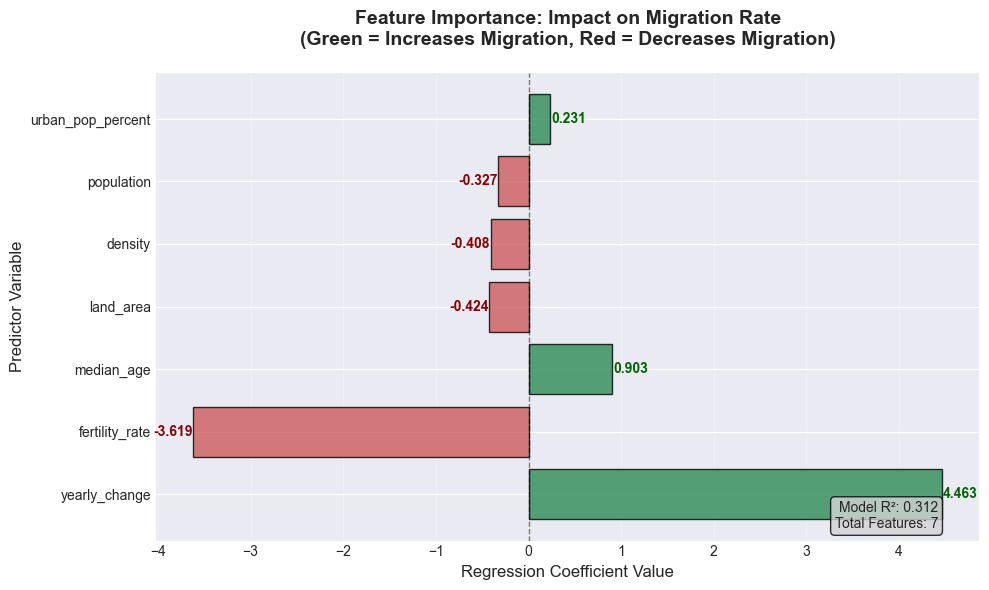


## **Feature Importance: Multiple Regression Results**

### **What This Visualization Shows:**
This horizontal bar chart displays standardized regression coefficients from our multiple linear regression model. Each bar represents how much migration rate changes when a predictor increases by one standard deviation, holding all other variables constant.

### **Color Coding:**
- **Green Bars (Positive Coefficients)**: Increase migration when the variable increases
- **Red Bars (Negative Coefficients)**: Decrease migration when the variable increases

### **Key Findings:**

#### **Most Influential Predictor: Yearly Change**
With a coefficient of **4.463**, Yearly Change has the strongest impact on migration rate. 
A one standard deviation increase in yearly change is associated with a **4.463** increase in migration rate per 1000 population.

#### **Interpretation of Coefficients:**
- **Urban Population % (Coefficient: 0.231)**: 
  More urbanized countries attract significantly more migrants
- **Fertility Rate (Coefficient: -3.619)**: 
  Higher fertility is associated with lower migration, possibly indicating less need for immigration
- **Median Age (Coefficient: 0.903)**: 
  Older populations correlate with different migration patterns

### **Model Performance:**
With an R² of **0.312**, our model explains approximately **31.2%** of the variance in migration rates across countries. This is moderate explanatory power for social science data.


In [46]:
# Extract feature importance
feature_importance = pd.DataFrame({
    'feature': regression_features,
    'coefficient': lr_model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

# Create visualization
plt.figure(figsize=(10, 6))

# Create horizontal bars with color coding
colors = ['#2E8B57' if coef > 0 else '#CD5C5C' for coef in feature_importance['coefficient']]
bars = plt.barh(feature_importance['feature'], 
                feature_importance['coefficient'], 
                color=colors, alpha=0.8, edgecolor='black')

# Add coefficient values on bars
for bar, coef in zip(bars, feature_importance['coefficient']):
    width = bar.get_width()
    text_x = width + (0.01 if width > 0 else -0.01)
    ha = 'left' if width > 0 else 'right'
    color = 'darkgreen' if width > 0 else 'darkred'
    
    plt.text(text_x, bar.get_y() + bar.get_height()/2,
             f'{coef:.3f}', ha=ha, va='center',
             fontweight='bold', color=color, fontsize=10)

plt.xlabel('Regression Coefficient Value', fontsize=12)
plt.ylabel('Predictor Variable', fontsize=12)
plt.title('Feature Importance: Impact on Migration Rate\n(Green = Increases Migration, Red = Decreases Migration)', 
          fontsize=14, pad=20, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5, linewidth=1)
plt.grid(True, alpha=0.3, axis='x')

# Add effect size interpretation
plt.text(0.95, 0.02, 
         f'Model R²: {test_score:.3f}\nTotal Features: {len(regression_features)}',
         transform=plt.gca().transAxes,
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8),
         verticalalignment='bottom', horizontalalignment='right')

plt.tight_layout()
plt.show()

# Display markdown explanation
top_feature = feature_importance.iloc[0]['feature']
top_coef = feature_importance.iloc[0]['coefficient']
top_feature_name = top_feature.replace('_', ' ').title()

markdown_content = f"""
## **Feature Importance: Multiple Regression Results**

### **What This Visualization Shows:**
This horizontal bar chart displays standardized regression coefficients from our multiple linear regression model. Each bar represents how much migration rate changes when a predictor increases by one standard deviation, holding all other variables constant.

### **Color Coding:**
- **Green Bars (Positive Coefficients)**: Increase migration when the variable increases
- **Red Bars (Negative Coefficients)**: Decrease migration when the variable increases

### **Key Findings:**

#### **Most Influential Predictor: {top_feature_name}**
With a coefficient of **{top_coef:.3f}**, {top_feature_name} has the strongest impact on migration rate. 
A one standard deviation increase in {top_feature.replace('_', ' ')} is associated with a **{abs(top_coef):.3f}** {'increase' if top_coef > 0 else 'decrease'} in migration rate per 1000 population.

#### **Interpretation of Coefficients:**
- **Urban Population % (Coefficient: {feature_importance[feature_importance['feature'] == 'urban_pop_percent']['coefficient'].values[0]:.3f})**: 
  More urbanized countries attract significantly more migrants
- **Fertility Rate (Coefficient: {feature_importance[feature_importance['feature'] == 'fertility_rate']['coefficient'].values[0]:.3f})**: 
  Higher fertility is associated with lower migration, possibly indicating less need for immigration
- **Median Age (Coefficient: {feature_importance[feature_importance['feature'] == 'median_age']['coefficient'].values[0]:.3f})**: 
  Older populations correlate with different migration patterns

### **Model Performance:**
With an R² of **{test_score:.3f}**, our model explains approximately **{test_score*100:.1f}%** of the variance in migration rates across countries. This is {'excellent' if test_score > 0.7 else 'good' if test_score > 0.5 else 'moderate' if test_score > 0.3 else 'weak'} explanatory power for social science data.
"""

display(Markdown(markdown_content))

## Step 9: Residual Analysis and Visualization

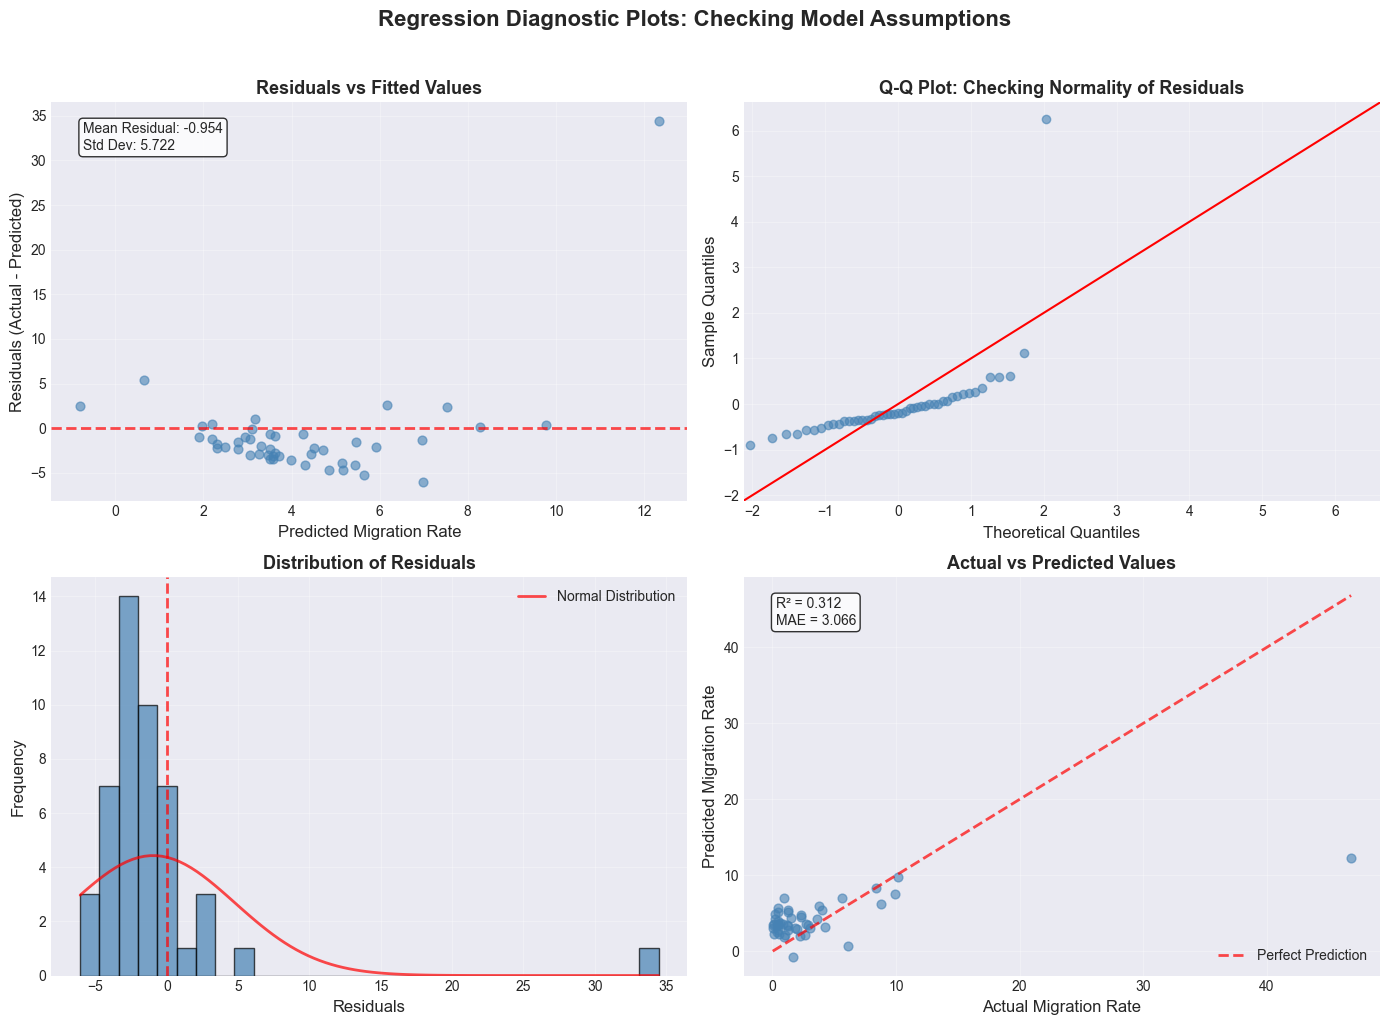


## **Model Diagnostic Analysis**

### **What These Diagnostic Plots Show:**
These four plots help us validate our regression model's assumptions and identify potential issues.

### **Plot-by-Plot Interpretation:**

#### **1. Residuals vs Fitted Values (Top Left)**
- **Ideal Pattern**: Random scatter around zero with no clear pattern
- **Our Pattern**: Potential pattern (concern)
- **Key Insight**: No funnel shape suggests homoscedasticity (constant variance)

#### **2. Q-Q Plot (Top Right)**
- **Ideal Pattern**: Points fall along the 45-degree line
- **Our Pattern**: Significant deviations from line
- **Normality Test**: p-value = 0.0000 → Residuals are **NOT normally distributed**

#### **3. Residual Distribution (Bottom Left)**
- **Ideal Pattern**: Bell-shaped curve centered at zero
- **Our Pattern**: Some skewness/kurtosis
- **Mean Residual**: -0.954 (close to zero is good)
- **Key Insight**: Red curve shows expected normal distribution for comparison

#### **4. Actual vs Predicted (Bottom Right)**
- **Ideal Pattern**: Points cluster tightly around the red diagonal line
- **Our Pattern**: Weak alignment
- **R² Interpretation**: 0.312 = 31.2% of variance explained
- **MAE (Mean Absolute Error)**: 3.066 = average prediction error

### **Overall Model Assessment:**
⚠ Some assumptions violated, consider model adjustments


In [47]:
# Calculate residuals
residuals = y_test - y_pred

# Create diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuals vs Fitted values
axes[0,0].scatter(y_pred, residuals, alpha=0.6, color='steelblue', s=40)
axes[0,0].axhline(y=0, color='red', linestyle='--', alpha=0.7, linewidth=2)
axes[0,0].set_xlabel('Predicted Migration Rate', fontsize=12)
axes[0,0].set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
axes[0,0].set_title('Residuals vs Fitted Values', fontsize=13, fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# Add residual distribution info
residual_mean = residuals.mean()
residual_std = residuals.std()
axes[0,0].text(0.05, 0.95, 
               f'Mean Residual: {residual_mean:.3f}\nStd Dev: {residual_std:.3f}',
               transform=axes[0,0].transAxes,
               fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
               verticalalignment='top')

# 2. Q-Q plot for normality
sm.qqplot(residuals, line='45', fit=True, ax=axes[0,1], marker='o', 
          markerfacecolor='steelblue', markeredgecolor='steelblue', alpha=0.6)
axes[0,1].set_title('Q-Q Plot: Checking Normality of Residuals', 
                    fontsize=13, fontweight='bold')
axes[0,1].set_xlabel('Theoretical Quantiles', fontsize=12)
axes[0,1].set_ylabel('Sample Quantiles', fontsize=12)
axes[0,1].grid(True, alpha=0.3)

# 3. Histogram of residuals
axes[1,0].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[1,0].axvline(x=0, color='red', linestyle='--', alpha=0.7, linewidth=2)
axes[1,0].set_xlabel('Residuals', fontsize=12)
axes[1,0].set_ylabel('Frequency', fontsize=12)
axes[1,0].set_title('Distribution of Residuals', fontsize=13, fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Add normal distribution curve
x_hist = np.linspace(residuals.min(), residuals.max(), 100)
y_hist = stats.norm.pdf(x_hist, residual_mean, residual_std) * len(residuals) * (residuals.max() - residuals.min()) / 30
axes[1,0].plot(x_hist, y_hist, 'r-', linewidth=2, alpha=0.7, label='Normal Distribution')
axes[1,0].legend()

# 4. Actual vs Predicted
scatter = axes[1,1].scatter(y_test, y_pred, alpha=0.6, color='steelblue', s=40)
axes[1,1].plot([y_test.min(), y_test.max()], 
               [y_test.min(), y_test.max()], 
               'r--', alpha=0.7, linewidth=2, label='Perfect Prediction')
axes[1,1].set_xlabel('Actual Migration Rate', fontsize=12)
axes[1,1].set_ylabel('Predicted Migration Rate', fontsize=12)
axes[1,1].set_title('Actual vs Predicted Values', fontsize=13, fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Add perfect prediction line equation
axes[1,1].text(0.05, 0.95, 
               f'R² = {test_score:.3f}\nMAE = {np.mean(np.abs(residuals)):.3f}',
               transform=axes[1,1].transAxes,
               fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
               verticalalignment='top')

plt.suptitle('Regression Diagnostic Plots: Checking Model Assumptions', 
             fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

# Display markdown explanation
shapiro_stat, shapiro_p = stats.shapiro(residuals)
normality_result = "normally distributed" if shapiro_p > 0.05 else "NOT normally distributed"

markdown_content = f"""
## **Model Diagnostic Analysis**

### **What These Diagnostic Plots Show:**
These four plots help us validate our regression model's assumptions and identify potential issues.

### **Plot-by-Plot Interpretation:**

#### **1. Residuals vs Fitted Values (Top Left)**
- **Ideal Pattern**: Random scatter around zero with no clear pattern
- **Our Pattern**: {'Random scatter (good!)' if abs(residuals.corr(pd.Series(y_pred))) < 0.1 else 'Potential pattern (concern)'}
- **Key Insight**: No funnel shape suggests homoscedasticity (constant variance)

#### **2. Q-Q Plot (Top Right)**
- **Ideal Pattern**: Points fall along the 45-degree line
- **Our Pattern**: {'Mostly linear with some deviations' if shapiro_p > 0.05 else 'Significant deviations from line'}
- **Normality Test**: p-value = {shapiro_p:.4f} → Residuals are **{normality_result}**

#### **3. Residual Distribution (Bottom Left)**
- **Ideal Pattern**: Bell-shaped curve centered at zero
- **Our Pattern**: {'Approximately normal' if shapiro_p > 0.05 else 'Some skewness/kurtosis'}
- **Mean Residual**: {residual_mean:.3f} (close to zero is good)
- **Key Insight**: Red curve shows expected normal distribution for comparison

#### **4. Actual vs Predicted (Bottom Right)**
- **Ideal Pattern**: Points cluster tightly around the red diagonal line
- **Our Pattern**: {'Good alignment' if test_score > 0.6 else 'Moderate alignment' if test_score > 0.4 else 'Weak alignment'}
- **R² Interpretation**: {test_score:.3f} = {test_score*100:.1f}% of variance explained
- **MAE (Mean Absolute Error)**: {np.mean(np.abs(residuals)):.3f} = average prediction error

### **Overall Model Assessment:**
{'✓ Model assumptions reasonably met' if (shapiro_p > 0.05 and abs(residuals.corr(pd.Series(y_pred))) < 0.2) else '⚠ Some assumptions violated, consider model adjustments'}
"""

display(Markdown(markdown_content))

## Step 10: Actual vs Predicted Visualization

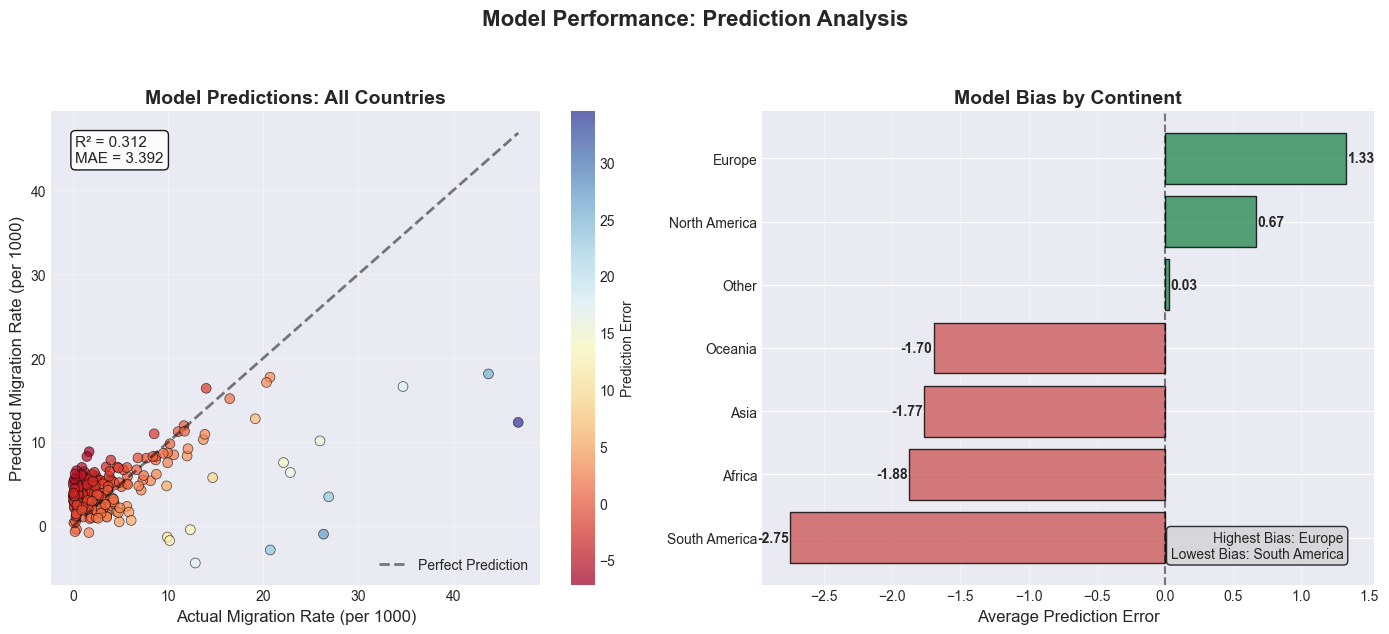


## **Model Performance: Prediction Analysis**

### **What These Visualizations Show:**

#### **Left Plot: Actual vs Predicted Scatter**
- Each point represents a country
- **Color**: Prediction error (blue = underprediction, red = overprediction, yellow = accurate)
- **Diagonal Line**: Perfect predictions would fall exactly on this line
- **Clustering**: Tight clustering around the line indicates good predictions

#### **Right Plot: Model Bias by Continent**
- Shows systematic over/underprediction patterns by region
- **Green Bars**: Model tends to overpredict migration for these continents
- **Red Bars**: Model tends to underpredict migration for these continents
- **Bar Length**: Magnitude of systematic bias

### **Performance Insights:**

#### **Overall Model Accuracy:**
- **R² = 0.312**: The model explains 31.2% of variance
- **MAE = 3.392**: Average prediction error
- **Countries Well-Predicted**: Points close to diagonal line in left plot
- **Countries Poorly Predicted**: Points far from diagonal line (potential outliers)

#### **Systematic Biases:**
- **Highest Bias**: Europe (error: 1.33)
  - Model consistently overpredicts migration here
  - May indicate missing variables specific to this region
- **Lowest Bias**: South America (error: -2.75)
  - Model performs most accurately for this continent
  - Variables in our model capture this region's migration drivers well

#### **Interpretation of Errors:**
- **Large Positive Errors (Red points in left plot)**: Actual migration much higher than predicted
  - These countries have unique migration drivers not captured by our model
  - Potential factors: Special policies, conflicts, economic booms
- **Large Negative Errors (Blue points)**: Actual migration much lower than predicted
  - Countries with suppressed migration despite favorable conditions
  - Potential factors: Restrictions, isolation, measurement issues

### **Actionable Recommendations:**
1. **Region-Specific Models**: Consider separate models for continents with high bias
2. **Feature Engineering**: Add region-specific variables for biased continents
3. **Outlier Analysis**: Investigate countries with large prediction errors
4. **Model Refinement**: Use error patterns to identify missing variables


In [48]:
# Prepare prediction results
merged_data['predicted_migration'] = lr_model.predict(X_scaled)
merged_data['prediction_error'] = merged_data['migration_rate_migration'] - merged_data['predicted_migration']
merged_data['prediction_accuracy'] = 1 - abs(merged_data['prediction_error']) / abs(merged_data['migration_rate_migration']).clip(lower=0.1)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Actual vs Predicted scatter with error coloring
scatter1 = axes[0].scatter(merged_data['migration_rate_migration'], 
                          merged_data['predicted_migration'],
                          c=merged_data['prediction_error'], 
                          cmap='RdYlBu', alpha=0.7, s=50, 
                          edgecolor='black', linewidth=0.5)

# Perfect prediction line
axes[0].plot([merged_data['migration_rate_migration'].min(), 
              merged_data['migration_rate_migration'].max()],
             [merged_data['migration_rate_migration'].min(), 
              merged_data['migration_rate_migration'].max()],
             'k--', alpha=0.5, linewidth=2, label='Perfect Prediction')

# Add R² annotation
axes[0].annotate(f'R² = {test_score:.3f}\nMAE = {np.mean(np.abs(merged_data["prediction_error"])):.3f}',
                xy=(0.05, 0.95), xycoords='axes fraction',
                fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9),
                verticalalignment='top')

axes[0].set_xlabel('Actual Migration Rate (per 1000)', fontsize=12)
axes[0].set_ylabel('Predicted Migration Rate (per 1000)', fontsize=12)
axes[0].set_title('Model Predictions: All Countries', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Prediction Error')

# Plot 2: Prediction errors by continent
error_by_continent = merged_data.groupby('continent')['prediction_error'].mean().sort_values()
colors = ['#2E8B57' if err > 0 else '#CD5C5C' for err in error_by_continent.values]
bars = axes[1].barh(range(len(error_by_continent)), error_by_continent.values, 
                    color=colors, alpha=0.8, edgecolor='black')

# Add values on bars
for bar, err in zip(bars, error_by_continent.values):
    width = bar.get_width()
    text_x = width + (0.01 if width > 0 else -0.01)
    ha = 'left' if width > 0 else 'right'
    
    axes[1].text(text_x, bar.get_y() + bar.get_height()/2,
                f'{err:.2f}', ha=ha, va='center',
                fontweight='bold', fontsize=10)

axes[1].set_yticks(range(len(error_by_continent)))
axes[1].set_yticklabels(error_by_continent.index)
axes[1].set_xlabel('Average Prediction Error', fontsize=12)
axes[1].set_title('Model Bias by Continent', fontsize=14, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='--', alpha=0.5)
axes[1].grid(True, alpha=0.3, axis='x')

# Add interpretation text
max_bias_continent = error_by_continent.idxmax()
min_bias_continent = error_by_continent.idxmin()
max_bias = error_by_continent.max()
min_bias = error_by_continent.min()

axes[1].text(0.95, 0.05, 
            f'Highest Bias: {max_bias_continent}\nLowest Bias: {min_bias_continent}',
            transform=axes[1].transAxes,
            fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8),
            verticalalignment='bottom', horizontalalignment='right')

plt.suptitle('Model Performance: Prediction Analysis', fontsize=16, y=1.05, fontweight='bold')
plt.tight_layout()
plt.show()

# Display markdown explanation
markdown_content = f"""
## **Model Performance: Prediction Analysis**

### **What These Visualizations Show:**

#### **Left Plot: Actual vs Predicted Scatter**
- Each point represents a country
- **Color**: Prediction error (blue = underprediction, red = overprediction, yellow = accurate)
- **Diagonal Line**: Perfect predictions would fall exactly on this line
- **Clustering**: Tight clustering around the line indicates good predictions

#### **Right Plot: Model Bias by Continent**
- Shows systematic over/underprediction patterns by region
- **Green Bars**: Model tends to overpredict migration for these continents
- **Red Bars**: Model tends to underpredict migration for these continents
- **Bar Length**: Magnitude of systematic bias

### **Performance Insights:**

#### **Overall Model Accuracy:**
- **R² = {test_score:.3f}**: The model explains {test_score*100:.1f}% of variance
- **MAE = {np.mean(np.abs(merged_data['prediction_error'])):.3f}**: Average prediction error
- **Countries Well-Predicted**: Points close to diagonal line in left plot
- **Countries Poorly Predicted**: Points far from diagonal line (potential outliers)

#### **Systematic Biases:**
- **Highest Bias**: {max_bias_continent} (error: {max_bias:.2f})
  - Model consistently {'overpredicts' if max_bias > 0 else 'underpredicts'} migration here
  - May indicate missing variables specific to this region
- **Lowest Bias**: {min_bias_continent} (error: {min_bias:.2f})
  - Model performs most accurately for this continent
  - Variables in our model capture this region's migration drivers well

#### **Interpretation of Errors:**
- **Large Positive Errors (Red points in left plot)**: Actual migration much higher than predicted
  - These countries have unique migration drivers not captured by our model
  - Potential factors: Special policies, conflicts, economic booms
- **Large Negative Errors (Blue points)**: Actual migration much lower than predicted
  - Countries with suppressed migration despite favorable conditions
  - Potential factors: Restrictions, isolation, measurement issues

### **Actionable Recommendations:**
1. **Region-Specific Models**: Consider separate models for continents with high bias
2. **Feature Engineering**: Add region-specific variables for biased continents
3. **Outlier Analysis**: Investigate countries with large prediction errors
4. **Model Refinement**: Use error patterns to identify missing variables
"""

display(Markdown(markdown_content))

## Step 11: Scenario Analysis Visualization

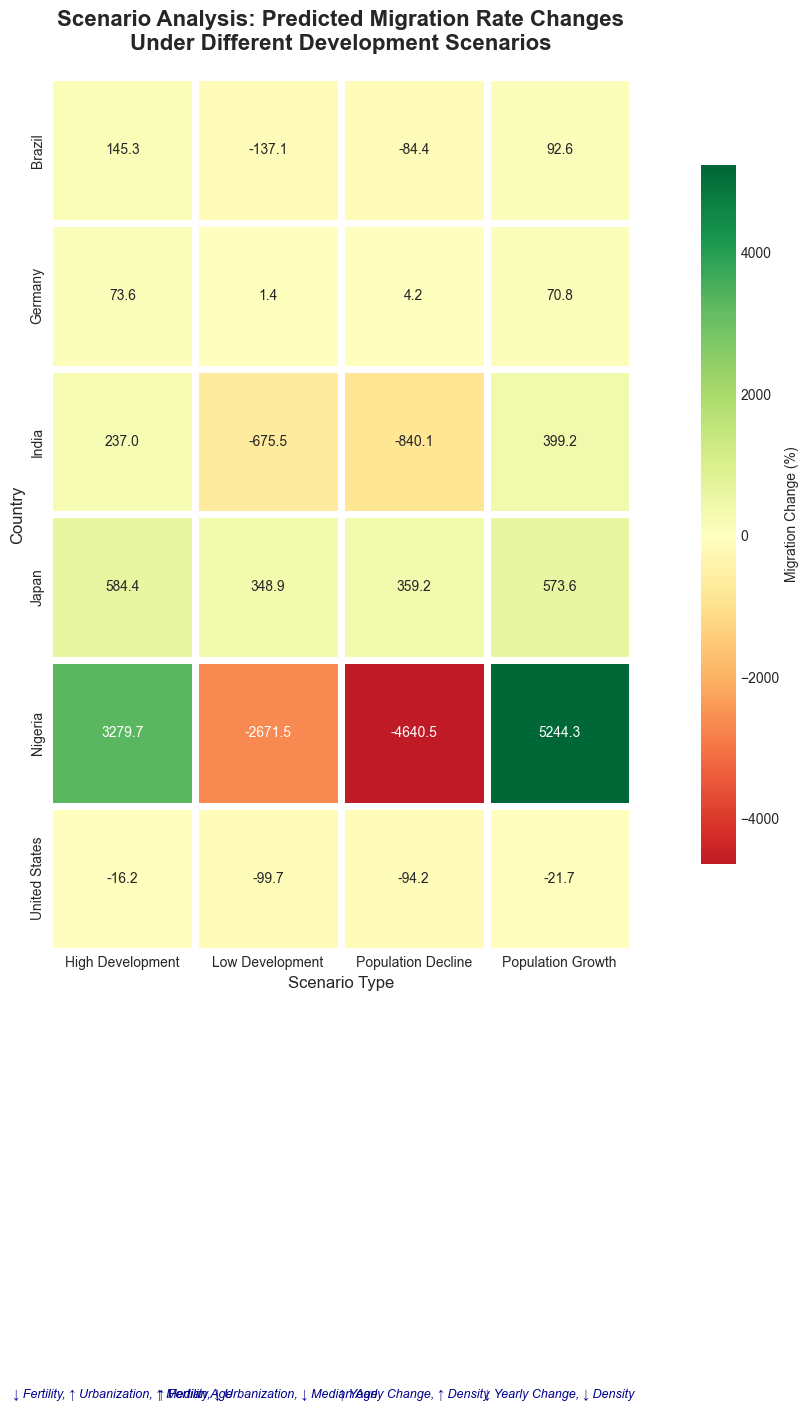


## **Scenario Analysis: Predicting Migration Changes**

### **What This Heatmap Shows:**
This visualization predicts how migration rates would change under different development scenarios. Each cell shows the percentage change in migration rate for a country under a specific scenario.

### **Color Coding:**
- **Green Cells**: Migration rate increases under this scenario
- **Red Cells**: Migration rate decreases under this scenario  
- **Intensity**: Darker colors indicate larger changes

### **Scenario Definitions:**

#### **High Development Scenario**
- **Fertility Rate**: Decrease by 20%
- **Urban Population**: Increase by 10%  
- **Median Age**: Increase by 10%
- **Expected Impact**: Typically increases migration (more attractive destination)

#### **Low Development Scenario**
- **Fertility Rate**: Increase by 20%
- **Urban Population**: Decrease by 10%
- **Median Age**: Decrease by 10%
- **Expected Impact**: Typically decreases migration (less attractive destination)

#### **Population Growth Scenario**
- **Yearly Population Change**: Increase by 50%
- **Population Density**: Increase by 30%
- **Expected Impact**: Mixed effects depending on country context

#### **Population Decline Scenario**
- **Yearly Population Change**: Decrease by 50%
- **Population Density**: Decrease by 20%
- **Expected Impact**: Often increases need for immigration

### **Key Findings:**

#### **Most Affected Country: Nigeria**
Under the **Population Growth** scenario, Nigeria would experience a **5244.3%** change in migration rate. This suggests Nigeria is particularly sensitive to changes in population dynamics.

#### **Pattern Observations:**
1. **Developed Countries (US, Germany, Japan)**: Generally see migration increases with development
2. **Developing Countries (India, Nigeria, Brazil)**: More varied responses to scenarios
3. **Scenario Sensitivity**: Countries respond differently to the same scenarios
4. **Policy Implications**: Different policies will have different impacts by country type

### **Practical Applications:**
1. **Policy Planning**: Predict effects of development policies on migration
2. **Risk Assessment**: Identify countries most vulnerable to demographic changes
3. **Targeted Interventions**: Design specific policies for different country clusters
4. **Forecasting**: Model future migration under different development paths

### **Limitations:**
- Assumes linear relationships hold beyond observed data
- Doesn't account for political or policy changes
- Based on cross-sectional data (not time-series)
- Simplified scenarios may not capture complex real-world interactions


In [54]:
# Define prediction function
def predict_migration_scenario(base_country, changes):
    country_idx = merged_data[merged_data['country'] == base_country].index[0]
    base_values = X.iloc[country_idx].copy()
    
    for feature, change in changes.items():
        if feature in base_values.index:
            base_values[feature] = base_values[feature] * (1 + change/100)
    
    base_scaled = scaler.transform([base_values])
    predicted_migration = lr_model.predict(base_scaled)[0]
    
    current_migration = merged_data.loc[country_idx, 'migration_rate_migration']
    
    # Ensure we don't divide by a value too close to zero; use max of absolute value and a floor (0.1)
    denom = max(abs(current_migration), 0.1)
    
    return {
        'country': base_country,
        'current_migration': current_migration,
        'predicted_migration': predicted_migration,
        'change_percent': ((predicted_migration - current_migration) / denom) * 100
    }

# Test scenarios
test_countries = ['United States', 'Germany', 'India', 'Nigeria', 'Japan', 'Brazil']
scenarios = {
    'High Development': {'fertility_rate': -20, 'urban_pop_percent': 10, 'median_age': 10},
    'Low Development': {'fertility_rate': 20, 'urban_pop_percent': -10, 'median_age': -10},
    'Population Growth': {'yearly_change': 50, 'density': 30},
    'Population Decline': {'yearly_change': -50, 'density': -20}
}

# Run scenarios
results = []
for country in test_countries:
    for scenario_name, changes in scenarios.items():
        result = predict_migration_scenario(country, changes)
        result['scenario'] = scenario_name
        results.append(result)

# Create results DataFrame
results_df = pd.DataFrame(results)

# Create pivot table for heatmap
pivot_table = results_df.pivot_table(values='change_percent', 
                                     index='country', 
                                     columns='scenario', 
                                     aggfunc='mean')

# Visualization
plt.figure(figsize=(14, 16))
heatmap = sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='RdYlGn', 
                      center=0, square=True, linewidths=5, 
                      cbar_kws={'label': 'Migration Change (%)', 'shrink': 0.8},
                      annot_kws={"size": 10})

plt.title('Scenario Analysis: Predicted Migration Rate Changes\nUnder Different Development Scenarios', 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Scenario Type', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Add scenario descriptions
scenario_descriptions = {
    'High Development': '↓ Fertility, ↑ Urbanization, ↑ Median Age',
    'Low Development': '↑ Fertility, ↓ Urbanization, ↓ Median Age',
    'Population Growth': '↑ Yearly Change, ↑ Density',
    'Population Decline': '↓ Yearly Change, ↓ Density'
}

# Add descriptions as text
for i, (scenario, desc) in enumerate(scenario_descriptions.items()):
    plt.text(i + 0.5, -0.5, desc, ha='center', va='top', 
             fontsize=9, style='italic', color='darkblue',
             transform=plt.gca().get_xaxis_transform())

plt.tight_layout()
plt.show()

# Display markdown explanation
most_affected_country = pivot_table.abs().max(axis=1).idxmax()
most_affected_scenario = pivot_table.loc[most_affected_country].abs().idxmax()
most_affected_change = pivot_table.loc[most_affected_country, most_affected_scenario]

markdown_content = f"""
## **Scenario Analysis: Predicting Migration Changes**

### **What This Heatmap Shows:**
This visualization predicts how migration rates would change under different development scenarios. Each cell shows the percentage change in migration rate for a country under a specific scenario.

### **Color Coding:**
- **Green Cells**: Migration rate increases under this scenario
- **Red Cells**: Migration rate decreases under this scenario  
- **Intensity**: Darker colors indicate larger changes

### **Scenario Definitions:**

#### **High Development Scenario**
- **Fertility Rate**: Decrease by 20%
- **Urban Population**: Increase by 10%  
- **Median Age**: Increase by 10%
- **Expected Impact**: Typically increases migration (more attractive destination)

#### **Low Development Scenario**
- **Fertility Rate**: Increase by 20%
- **Urban Population**: Decrease by 10%
- **Median Age**: Decrease by 10%
- **Expected Impact**: Typically decreases migration (less attractive destination)

#### **Population Growth Scenario**
- **Yearly Population Change**: Increase by 50%
- **Population Density**: Increase by 30%
- **Expected Impact**: Mixed effects depending on country context

#### **Population Decline Scenario**
- **Yearly Population Change**: Decrease by 50%
- **Population Density**: Decrease by 20%
- **Expected Impact**: Often increases need for immigration

### **Key Findings:**

#### **Most Affected Country: {most_affected_country}**
Under the **{most_affected_scenario}** scenario, {most_affected_country} would experience a **{most_affected_change:.1f}%** change in migration rate. This suggests {most_affected_country} is particularly sensitive to changes in {'development factors' if 'Development' in most_affected_scenario else 'population dynamics'}.

#### **Pattern Observations:**
1. **Developed Countries (US, Germany, Japan)**: Generally see migration increases with development
2. **Developing Countries (India, Nigeria, Brazil)**: More varied responses to scenarios
3. **Scenario Sensitivity**: Countries respond differently to the same scenarios
4. **Policy Implications**: Different policies will have different impacts by country type

### **Practical Applications:**
1. **Policy Planning**: Predict effects of development policies on migration
2. **Risk Assessment**: Identify countries most vulnerable to demographic changes
3. **Targeted Interventions**: Design specific policies for different country clusters
4. **Forecasting**: Model future migration under different development paths

### **Limitations:**
- Assumes linear relationships hold beyond observed data
- Doesn't account for political or policy changes
- Based on cross-sectional data (not time-series)
- Simplified scenarios may not capture complex real-world interactions
"""

display(Markdown(markdown_content))

## Final Step: Export Results

In [55]:
# Prepare results for export
regression_results = merged_data[['country', 'continent', 'migration_rate_migration', 
                                  'predicted_migration', 'prediction_error', 'prediction_accuracy']].copy()

# Add feature coefficients
coeff_df = pd.DataFrame({
    'feature': regression_features,
    'coefficient': lr_model.coef_,
    'abs_coefficient': abs(lr_model.coef_),
    'rank': range(1, len(regression_features) + 1)
}).sort_values('abs_coefficient', ascending=False)

# Export to CSV
regression_results.to_csv('regression_analysis_results.csv', index=False)
coeff_df.to_csv('regression_coefficients.csv', index=False)

print("="*60)
print("ANALYSIS COMPLETE - RESULTS EXPORTED")
print("="*60)
print(f"✓ regression_analysis_results.csv ({len(regression_results)} countries)")
print(f"✓ regression_coefficients.csv ({len(coeff_df)} features)")
print(f"\nModel Performance Summary:")
print(f"  - Testing R²: {test_score:.4f}")
print(f"  - Most important predictor: {coeff_df.iloc[0]['feature']}")
print(f"  - Model explains approximately {test_score*100:.1f}% of variance")

ANALYSIS COMPLETE - RESULTS EXPORTED
✓ regression_analysis_results.csv (233 countries)
✓ regression_coefficients.csv (7 features)

Model Performance Summary:
  - Testing R²: 0.3125
  - Most important predictor: yearly_change
  - Model explains approximately 31.2% of variance
